# Survival Analysis (time-to-event analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter

In [3]:
df = pd.read_csv("C:/Users/timsh/Downloads/Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)

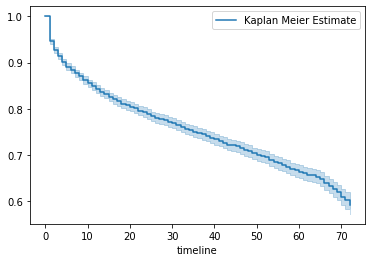

In [10]:
durations = df['tenure']
event_observed = df['Churn']

km = KaplanMeierFitter()
km.fit(durations, event_observed, label='Kaplan Meier Estimate')
km.plot()

Kaplan Meier Curves for Cohorts

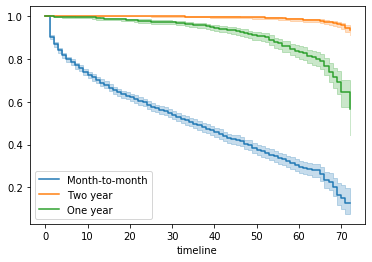

In [14]:
kmf = KaplanMeierFitter()

T = df['tenure']
E = df['Churn']

groups = df['Contract']
ix1 = (groups == 'Month-to-month')
ix2 = (groups == 'Two year')
ix3 = (groups == 'One year')

kmf.fit(T[ix1], E[ix1], label = 'Month-to-month')
ax = kmf.plot()

kmf.fit(T[ix2], E[ix2], label = 'Two year')
ax1 = kmf.plot(ax=ax)

kmf.fit(T[ix3], E[ix3], label = 'One year')
kmf.plot(ax=ax1)

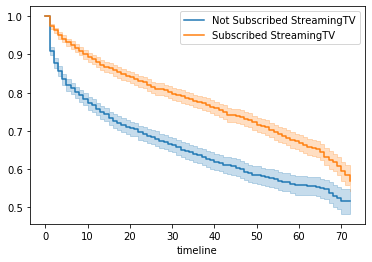

In [13]:
kmf1 = KaplanMeierFitter()

groups = df['StreamingTV']
i1 = (groups == 'No')
i2 = (groups == 'Yes')

kmf1.fit(T[i1], E[i1], label='Not Subscribed StreamingTV')
a1 = kmf1.plot()

kmf1.fit(T[i2], E[i2], label='Subscribed StreamingTV')
kmf1.plot(ax=a1)

# Cox Proportional Hazard Model (Survival Regression)

In [15]:
from lifelines import CoxPHFitter

In [16]:
df_r = df.loc[:,['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges',
                'SeniorCitizen','StreamingTV']]
df_r.head()

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,0,Female,Yes,No,No,29.85,0,No
1,34,0,Male,No,No,Yes,56.95,0,No
2,2,1,Male,No,No,Yes,53.85,0,No
3,45,0,Male,No,No,No,42.30,0,No
4,2,1,Female,No,No,Yes,70.70,0,No


In [17]:
# Create dummy variables
df_dummy = pd.get_dummies(df_r,drop_first=True)
df_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


In [18]:
cph = CoxPHFitter()
cph.fit(df_dummy, 'tenure', event_col='Churn')
cph.print_summary()

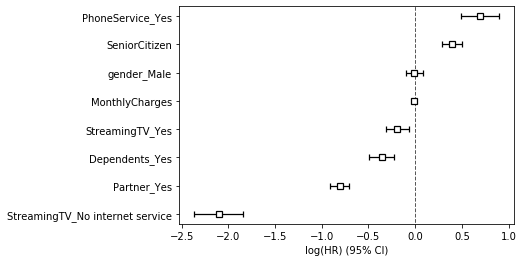

In [19]:
cph.plot()

In [20]:
## We want to see the Survival curve at the customer level.

tr_rows = df_dummy.iloc[5:10,2:]
tr_rows

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
5,99.65,0,0,0,0,1,0,1
6,89.10,0,1,0,1,1,0,1
7,29.75,0,0,0,0,0,0,0
8,104.80,0,0,1,0,1,0,1
9,56.15,0,1,0,1,1,0,0


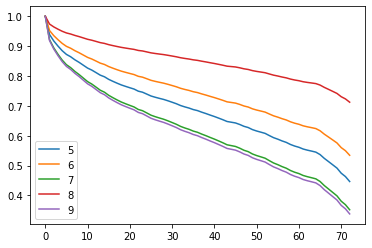

In [21]:
cph.predict_survival_function(tr_rows).plot()

In [22]:
# c-index evalutes the accuracy of the ranking of predicted time, 1.0 is perfect
print(cph.concordance_index_) 

0.7108933879138637


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.





1. Variable 'MonthlyCharges' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'MonthlyCharges' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'MonthlyCharges' using pd.cut, and then specify it in
`strata=['MonthlyCharges', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'Partner_Yes' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['Partner_Yes', ...]` in the
call in `.fit`. See documentation in link [E] below.

3. Variable 'PhoneService_Yes' failed the non-proportional test: p-value is 0.0071.

   Advice: 

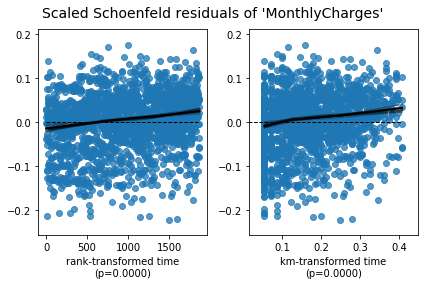

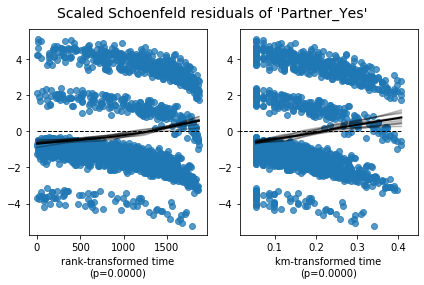

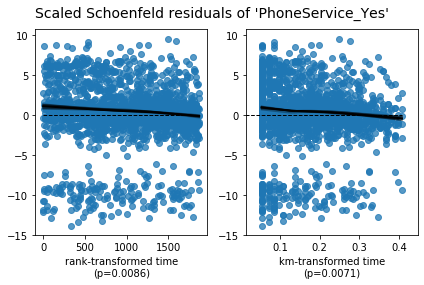

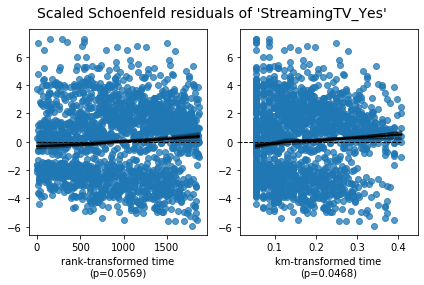

In [23]:
# Testing the proportionaly hazard assumptions
# all individuals have the same hazard function, but a unique scaling factor
# that is not time varying
# Null hypothesis: coefficient is not time-varying
cph.check_assumptions(df_dummy, p_value_threshold=0.05, show_plots=True)

In [49]:
## Fix the MonthlyCharges by converting it to Bin variable and stratify on it
df_dummy_strata = df_dummy.copy()
df_dummy_strata['MonthlyCharges_strata'] = pd.cut(df_dummy_strata['MonthlyCharges'],
                                                                 np.arange(15,120,8))
df_dummy_strata[['MonthlyCharges','MonthlyCharges_strata']].head()

,MonthlyCharges,MonthlyCharges_strata
0,29.85,"(23, 31]"
1,56.95,"(55, 63]"
2,53.85,"(47, 55]"
3,42.30,"(39, 47]"
4,70.70,"(63, 71]"


In [50]:
df_dummy_strata = df_dummy_strata.drop('MonthlyCharges',axis=1)

In [61]:
cph.fit(df_dummy_strata,'tenure', event_col='Churn', 
        strata=['MonthlyCharges_strata','Partner_Yes'])

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

In [56]:
cph.print_summary()

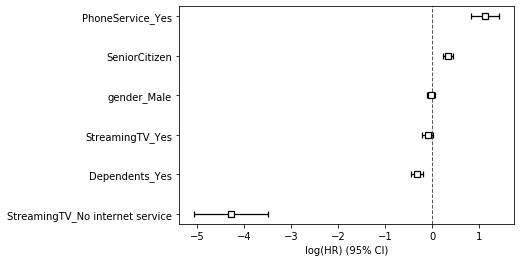

In [57]:
cph.plot()

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.





1. Variable 'PhoneService_Yes' failed the non-proportional test: p-value is 0.0014.

   Advice: with so few unique values (only 2), you can include `strata=['PhoneService_Yes', ...]` in
the call in `.fit`. See documentation in link [E] below.

2. Variable 'StreamingTV_No internet service' failed the non-proportional test: p-value is 0.0288.

   Advice: with so few unique values (only 2), you can include `strata=['StreamingTV_No internet
service', ...]` in the call in `.fit`. See documentation in link [E] below.

3. Variable 'StreamingTV_Yes' failed the non-proportional test: p-value is 0.0077.

   Advice: with so few unique values (only 2), you can include `strata=['StreamingTV_Yes', ...]` in
the call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-strat

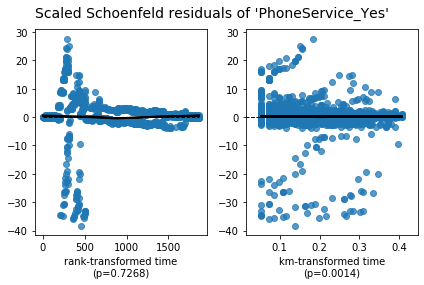

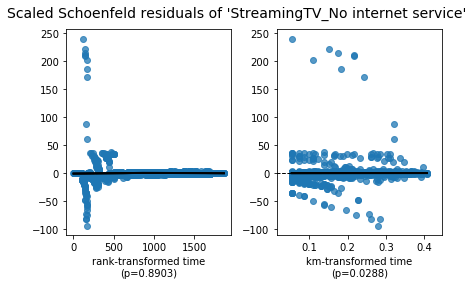

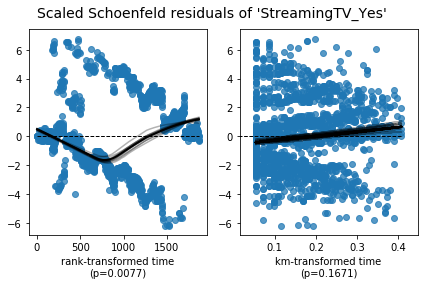

In [58]:
cph.check_assumptions(df_dummy_strata, p_value_threshold=0.05, show_plots=True)